In [1]:
#!pip install pyodbc
#!pip install prettytable
#!pip install numpy
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn

# Importing Necessary Libraries

In [2]:
import pyodbc                                              # for database Connection
from prettytable import PrettyTable                        # for showing fetched data in a tabular form
import pandas as pd                                        # for generating dataframe for different analysis
import matplotlib.pyplot as plt   
import seaborn as sns                                      # matplotlib & seaborn for visualization
from matplotlib.backends.backend_pdf import PdfPages       # to export charts into a pdf (sharing purpose)

## SQL Data Extraction 

3 Tasks are there to be done using SQL, this is the content of this section

In [3]:
# Connecting the database and checking

connection = pyodbc.connect('Driver={SQL Server};' 'Server=myserver;'  #replaced my server original name   
                     'Database=DataAnalysisAssignment;' 'Trusted_connection=yes')

# In Server Field my Server Name is given, please replace for running in other machine
# for Database consistency I've attached a backup file of DataAnalysisAssignment Database with the file

if connection:
    print("True")

True


1.  Top 5 customers who have made the ***Highest Total Purchases***

In [4]:
# Query for the problem statement
query = '''
SELECT TOP 5 
        C.FirstName
        , C.LastName
        , C.Email
        , C.Address
        , C.City
        , C.Country
        , ROUND(SUM(o.TotalAmount),2) AS TotalAmountSpent 
FROM Customer C 
     INNER JOIN Orders O ON C.CustomerID = O.CustomerID 
GROUP BY C.CustomerID
        , C.FirstName
        , C.LastName
        , C.Email
        , C.Address
        , C.City
        , C.Country 
ORDER BY TotalAmountSpent DESC; 
'''

# cursor to execute the query
cursor = connection.cursor()

# execute the query through cursor
cursor.execute(query)

# gathering the result
data = cursor.fetchall()

## creating a tabular view for the result of the query

# executed query has the following columns in this order
columns = ['FirstName', 'LastName', 'Email', 'Address', 'City', 'Country', 'TotalAmountSpent']

# PrettyTable table object with the columns
Resulttable = PrettyTable(columns)

# Adding rows to the table
for row in data:
    Resulttable.add_row(row)

# Displaying the result as table
Resulttable

FirstName,LastName,Email,Address,City,Country,TotalAmountSpent
NICHOLE,NARA,nichole16@adventure-works.com,Hauptstr 6039,Berlin,Germany,13295.38
KAITLYN,HENDERSON,kaitlyn72@adventure-works.com,1234 Seaside Way,San Francisco,United States,13294.27
MARGARET,HE,margaret25@adventure-works.com,5469 Poor Ridge Court,Gold Coast,Australia,13269.27
RANDALL,DOMINGUEZ,randall14@adventure-works.com,9 Olive Way,Seattle,United States,13265.99
ADRIANA,GONZALEZ,adriana19@adventure-works.com,4430 Ardilla Road,North Ryde,Australia,13242.7


2. ***Month-over-Month Growth Rate*** of *Total Revenue* for each *Product Category*

In [5]:
# Query for the problem statement
query2 = '''
WITH MonthWiseRevenue AS (     
        SELECT  
                P.Category
                , YEAR(o.OrderDate) AS OrderYear
                , MONTH(o.OrderDate) AS OrderMonth
                , ROUND(SUM(o.TotalAmount),2) AS TotalRevenue     
        FROM  Orders O   
              INNER JOIN  Products P ON O.ProductID = P.ProductID     
        GROUP BY P.Category
                 , Year(O.OrderDate)
                 , MONTH(O.OrderDate)
)  
    SELECT MR.Category
           , MR.OrderYear
           , CASE WHEN MR.OrderMonth = 1 THEN 'January' 
                  WHEN MR.OrderMonth = 2 THEN 'February'
                  WHEN MR.OrderMonth = 3 THEN 'March'
                  WHEN MR.OrderMonth = 4 THEN 'April'
                  WHEN MR.OrderMonth = 5 THEN 'May'
                  WHEN MR.OrderMonth = 6 THEN 'June'
                  WHEN MR.OrderMonth = 7 THEN 'July'
                  WHEN MR.OrderMonth = 8 THEN 'August'
                  WHEN MR.OrderMonth = 9 THEN 'September'
                  WHEN MR.OrderMonth = 10 THEN 'October'
                  WHEN MR.OrderMonth = 11 THEN 'November'
                  WHEN MR.OrderMonth = 12 THEN 'December' END AS Month
            , MR.TotalRevenue
            , ROUND((MR.TotalRevenue / LAG(MR.TotalRevenue, 1) 
                  OVER(PARTITION BY MR.Category ORDER BY MR.OrderYear, MR.OrderMonth)-1)*100, 2) AS GrowthRate 
    FROM MonthWiseRevenue MR 
    ORDER BY MR.Category
            , MR.OrderYear
            , MR.OrderMonth; 
'''

# executing the query and fetching the result
cursor.execute(query2)
data2 = cursor.fetchall()

# Table formation
columns = ['Category', 'OrderYear', 'Month', 'TotalRevenue', 'GrowthRate']

Resulttable2 = PrettyTable(columns)

for row in data2:
    Resulttable2.add_row(row)

Resulttable2  # GrowthRate Column unit is % 

Category,OrderYear,Month,TotalRevenue,GrowthRate
Accessories,2011,May,447.89,None
Accessories,2011,June,157.26,-64.89
Accessories,2011,July,1006.01,539.71
Accessories,2011,August,1339.93,33.19
Accessories,2011,September,119.74,-91.06
Accessories,2011,October,2080.04,1637.13
Accessories,2011,November,200.5,-90.36
Accessories,2011,December,665.08,231.71
Accessories,2012,January,2031.74,205.49
Accessories,2012,February,864.82,-57.43


3. ***3 Best-Selling products*** in each *Category*

In [6]:
# Query for the problem statement
query3 = '''
WITH BestSellingProducts AS (     
        SELECT P.ProductName
               , P.Category
               , SUM(O.Quantity) AS TotalQuantitySold
               , ROW_NUMBER() OVER (PARTITION BY P.Category ORDER BY SUM(O.Quantity) DESC) AS SL     
        FROM Products P   
             INNER JOIN Orders O ON P.ProductID = O.ProductID     
        GROUP BY P.ProductName
                 , P.Category 
)  
SELECT ProductName, Category, TotalQuantitySold 
FROM  BestSellingProducts 
WHERE SL <= 3 
ORDER BY Category, SL; 
'''

# executing the query and fetching the result
cursor.execute(query3)
data3 = cursor.fetchall()

# Table formation
columns = ['ProductName', 'Category', 'TotalQuantitySold']

Resulttable3 = PrettyTable(columns)

for row in data3:
    Resulttable3.add_row(row)

Resulttable3

ProductName,Category,TotalQuantitySold
Water Bottle - 30 oz.,Accessories,6815
"Sport-100 Helmet, Blue",Accessories,6743
"Sport-100 Helmet, Black",Accessories,6532
"Mountain-200 Black, 38",Bikes,2977
"Mountain-200 Black, 42",Bikes,2664
"Mountain-200 Silver, 38",Bikes,2394
AWC Logo Cap,Clothing,8311
"Long-Sleeve Logo Jersey, L",Clothing,6592
"Classic Vest, S",Clothing,4247
"LL Road Frame - Black, 52",Components,1581


## Data Preparation

In this section my task is to 
<br>
> Retrieve data from SQL and create dataframe (3 dataframes)
<br>
> Merge the dataframes and create a new dataframe
<br>
> Take the subset of the dataframe and showing 1st 10 rows

### Data Retrieving

In [7]:
# Data retrieving from database needs pyodbc library, imported earlier
# For dataframe creation and other task pandas library to be used, imported earlier

# Query to extract data from Customer table
queryforCustomer = '''
    SELECT * 
    FROM Customer
'''

# Forming a Pandas DataFrame with the query
df_Customer = pd.read_sql_query(queryforCustomer, connection) # Customer Table

# observing the data
df_Customer.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,CustomerID,FirstName,LastName,Email,Address,City,Country
0,11000,JON,YANG,jon24@adventure-works.com,1970 Napa Ct.,Bothell,United States
1,11001,EUGENE,HUANG,eugene10@adventure-works.com,9833 Mt. Dias Blv.,Bothell,United States
2,11002,RUBEN,TORRES,ruben35@adventure-works.com,7484 Roundtree Drive,Bothell,United States
3,11003,CHRISTY,ZHU,christy12@adventure-works.com,9539 Glenside Dr,Bothell,United States
4,11004,ELIZABETH,JOHNSON,elizabeth5@adventure-works.com,1226 Shoe St.,Bothell,United States


In [8]:
# Query to extract data from Products table
queryforProducts = '''
    SELECT * 
    FROM Products
'''

df_Products = pd.read_sql_query(queryforProducts, connection) # Products Table
df_Products.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,ProductID,ProductName,Category,Price
0,680,"HL Road Frame - Black, 58",Components,1431.500000
1,706,"HL Road Frame - Red, 58",Components,1431.500000
2,707,"Sport-100 Helmet, Red",Accessories,34.990002
3,708,"Sport-100 Helmet, Black",Accessories,34.990002
4,709,"Mountain Bike Socks, M",Clothing,9.500000


In [9]:
# Price Column's data seems clumsy, so rounding upto 2 decimal point
df_Products['Price'] = df_Products['Price'].round(2)

# Now checking the data
df_Products.head()

,ProductID,ProductName,Category,Price
0,680,"HL Road Frame - Black, 58",Components,1431.50
1,706,"HL Road Frame - Red, 58",Components,1431.50
2,707,"Sport-100 Helmet, Red",Accessories,34.99
3,708,"Sport-100 Helmet, Black",Accessories,34.99
4,709,"Mountain Bike Socks, M",Clothing,9.50


In [10]:
# Query to extract data from Orders table
queryforOrders = '''
    SELECT * 
    FROM Orders
'''

df_Orders = pd.read_sql_query(queryforOrders, connection) # Orders Table
df_Orders.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,OrderID,CustomerID,ProductID,OrderDate,Quantity,TotalAmount
0,43659,29825,776,2011-05-31,1,2024.98999
1,43659,29825,777,2011-05-31,3,2024.98999
2,43659,29825,778,2011-05-31,1,2024.98999
3,43659,29825,771,2011-05-31,1,2039.98999
4,43659,29825,772,2011-05-31,1,2039.98999


In [11]:
# Rounding the TotalAmount column upto 2 decimal points
df_Orders['TotalAmount'] = df_Orders['TotalAmount'].round(2)
df_Orders.head()

,OrderID,CustomerID,ProductID,OrderDate,Quantity,TotalAmount
0,43659,29825,776,2011-05-31,1,2024.99
1,43659,29825,777,2011-05-31,3,2024.99
2,43659,29825,778,2011-05-31,1,2024.99
3,43659,29825,771,2011-05-31,1,2039.99
4,43659,29825,772,2011-05-31,1,2039.99


In [12]:
# Extraction fom Database is completed, so it is ideal to close the connection  
connection.close()

**I've uploaded the dataset's csv file in Github, if you need to run and see the output without any hassle please uncomment the following cell and run**

In [13]:
#df_Customer = pd.read_csv('https://raw.githubusercontent.com/sha2992/Assignment-Dataset/main/Customer%20Table.csv')
#df_Products = pd.read_csv('https://raw.githubusercontent.com/sha2992/Assignment-Dataset/main/Products%20Table.csv')
#df_Orders = pd.read_csv('https://raw.githubusercontent.com/sha2992/Assignment-Dataset/main/Orders%20Table.csv')

### Data Mergeing & New DataFrame

In [14]:
# Creating a new DataFrame merging the previous 3 DataFrames
merged_df = df_Orders.merge(df_Products, on = 'ProductID')\
                     .merge(df_Customer, on = 'CustomerID')

# Selecting columns for the final DataFrame
work_df = merged_df[['OrderID', 
                     'CustomerID','FirstName','LastName',
                     'ProductName','Category','OrderDate', 'Quantity','Price','TotalAmount']] # Price is required for a task

In [15]:
work_df.head(10)  # To show 1st 10 rows given parameter 10 in head

,OrderID,CustomerID,FirstName,LastName,ProductName,Category,OrderDate,Quantity,Price,TotalAmount
0,43831,11028,JILL,JIMENEZ,"Mountain-100 Black, 42",Bikes,2013-03-30,1,3374.99,3374.99
1,57943,11028,JILL,JIMENEZ,"Mountain-200 Silver, 38",Bikes,2013-08-30,1,2319.99,2319.99
2,57943,11028,JILL,JIMENEZ,Patch Kit/8 Patches,Accessories,2013-08-30,1,2.29,2.29
3,67961,11028,JILL,JIMENEZ,"Touring-3000 Yellow, 50",Bikes,2014-05-04,1,742.35,742.35
4,57943,11028,JILL,JIMENEZ,HL Mountain Tire,Accessories,2013-08-30,1,35.00,35.00
5,43960,11046,CHRISTINE,YUAN,"Mountain-100 Black, 42",Bikes,2013-10-23,1,3374.99,3374.99
6,69653,11046,CHRISTINE,YUAN,"Sport-100 Helmet, Red",Accessories,2013-09-30,1,34.99,34.99
7,70651,11046,CHRISTINE,YUAN,"Mountain-200 Silver, 38",Bikes,2013-06-27,1,2319.99,2319.99
8,69653,11046,CHRISTINE,YUAN,"Half-Finger Gloves, M",Clothing,2013-09-30,1,24.49,24.49
9,70651,11046,CHRISTINE,YUAN,Hitch Rack - 4-Bike,Accessories,2013-06-30,1,120.00,120.00


## Data Visualization

Tasks of this portion are:
<br>
- A bar chart showing the total revenue generated by each product category.
- A line chart showing the trend of total orders over time (monthly).
- A scatter plot comparing the quantity of products ordered against the price of the product.


For the Bar Chart of total revenue by each product category

Text(0, 0.5, 'Total Revenue')

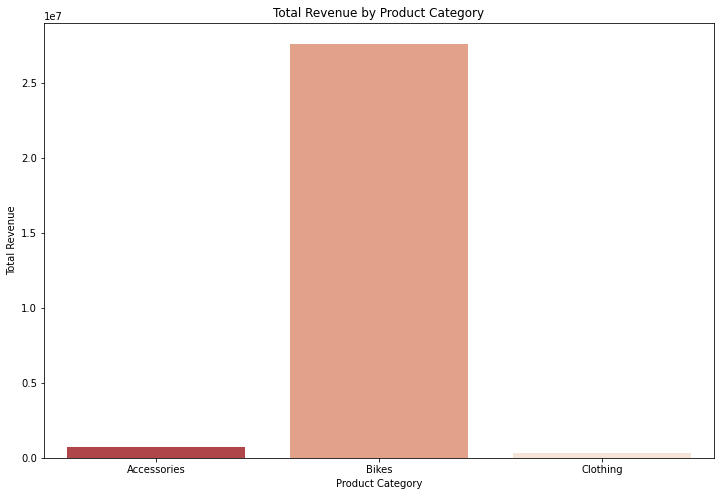

In [16]:
# matplotlib and seaborn library required, imported earlier
%matplotlib inline

# to find the total amount earned by category
categoryWise_Revenue = work_df.groupby('Category')['TotalAmount'].agg([sum])

#categoryWise_Revenue

# For creating the visual in a size I prefer to show
plt.figure(figsize=(12, 8))       

# Setting a color palette for the plots
sns.set_palette('RdBu')         

# Showing the bar graph
sns.barplot(x=categoryWise_Revenue.index, y='sum', 
            data=categoryWise_Revenue, 
            ci=None)

# Chart labelling elements
plt.title('Total Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')

***Key Points*** from this graph
- Among the Product categories Bikes has earned the most revenue. This category's (Bikes) total revenue is way more than other two categories.
- Clothing category has the least revenue

For the Line chart for showing trend of total monthly orders over time

C:\Users\DELL\AppData\Local\Temp\ipykernel_38660\79632805.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  work_df['OrderDate'] = pd.to_datetime(work_df['OrderDate'])


Text(0, 0.5, 'Total Orders')

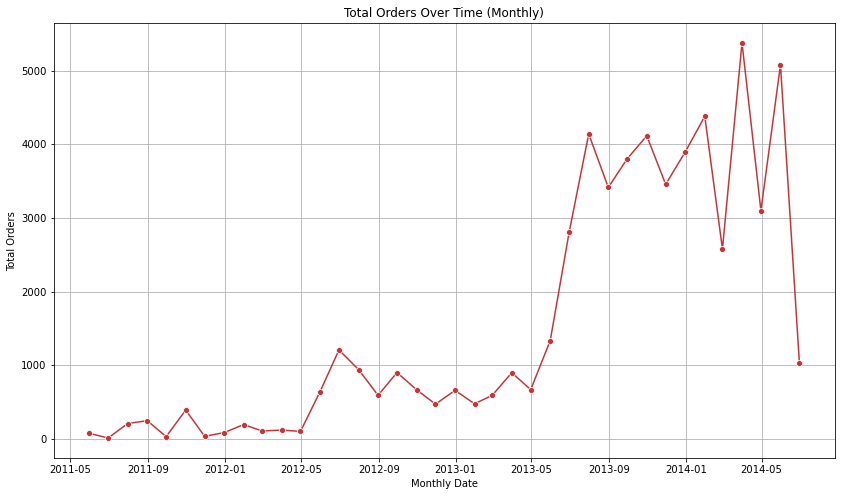

In [17]:
# Converting the date column into a form that pandas will recognize
work_df['OrderDate'] = pd.to_datetime(work_df['OrderDate'])

# Resampling based on month and count orders
monthly_orders = work_df.resample('M', on='OrderDate')['OrderID'].count()

#monthly_orders.index

plt.figure(figsize=(14, 8))

# Enabling the gridline in the chart
plt.grid(True)

# Showing the line graph
sns.lineplot(data=monthly_orders,
            x=monthly_orders.index,
            y=monthly_orders.values,
            marker='o')

# Chart labelling elements
plt.title('Total Orders Over Time (Monthly)')
plt.xlabel('Monthly Date')
plt.ylabel('Total Orders')

***Key Points*** from this graph

- There seems a consistent trend of higher order after the month of May (5th Month), for atleast a couple of months
- Orders tend to decrease between April (4th month) and May (5th month) compared to the preceding month (March to April)
- Orders between September (9th Month) and October (10th Month)
  
      - In 2011, were lower than the previous month
      - In 2012 & 2013 were higher than the previous month

- Orders between November and December show a decrease compared to the previous month.
- Orders between December and January increased compared to the previous month.

Scatter plot for comparing Quantity of products Ordered against the Price

Text(0, 0.5, 'Product Price')

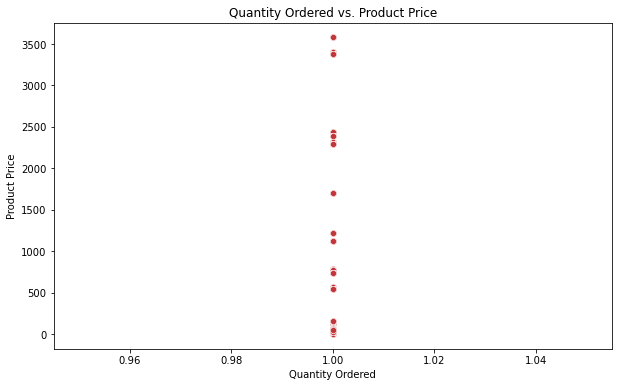

In [18]:
plt.figure(figsize=(10, 6))

# Showing the scatter plot
sns.scatterplot(x='Quantity',
                y='Price',
                data=work_df)

# Chart labelling elements
plt.title('Quantity Ordered vs. Product Price')
plt.xlabel('Quantity Ordered')
plt.ylabel('Product Price')

Every Product has been bought in a quantity of 1 (Dataset is not an ideal may be). Let's see a couple of insights we can figure out.

***Key Points***

- Products with price excess of USD 3000 has been bought lesser time as points are much there (higher-priced items are less frequently purchased)
- Products with price between USD 1 to USD 500 has been bought more than other price ranges (lower or moderate priced items get consumers' preference)

## Automation

Task is to done all the previous works (Data Retrieve, Data Merge, Data Visualize) through a function

In [19]:
#function will take an argument, dataset, which will be a list that will store the table name  

def fetch_and_process_data(dataset):
    '''
    Automates the earlier tasks of Data extraction, preparation, and visualization 
    and returns the charts in a shareable Pdf file  

    Parameter:
        dataset (list): A list which contains the name of the tables as stored in the Database

    Returns:
        Pdf File: A Pdf file where the visualization will be saved squentially.
                    (this will be saved at a directory, same directory where this file is)
        DisplayData: A DataFrame containing 10 rows with the columns of interest (this will be the cell output)
        
    '''
    
    # For database connection
    connection = pyodbc.connect('Driver=SQL Server;' 'Server=DESKTOP-73ELNP5;'
                          'Database=DataAnalysisAssignment;' 'Trusted_connection=yes')

    # An Empty Dictionary that will store DataFrames
    dfs = {}

    # Generating DataFrame from database using SQL query based on table name
    for table_name in dataset:
        # Fetch data for each table
        query = f'SELECT * FROM {table_name}'
        
        df = pd.read_sql_query(query, connection)

        # Rounding the columns where required
        if 'Price' in df.columns:
            df['Price'] = df['Price'].round(2)
        if 'TotalAmount' in df.columns:
            df['TotalAmount'] = df['TotalAmount'].round(2)

        # Add DataFrame to the dictionary
        dfs[table_name] = df

    # Closing database connection
    connection.close()
    
    # Merging DataFrames
    merged_df = dfs['Orders'].merge(dfs['Products'], on='ProductID') \
                              .merge(dfs['Customer'], on='CustomerID')

    # Selecting columns for the final DataFrame
    work_df = merged_df[['OrderID', 'CustomerID', 'FirstName', 'LastName',
                         'ProductName', 'Category', 'OrderDate', 'Quantity', 'Price', 'TotalAmount']]
    
    # Data showing
    # this value will be returned from the function as task demands 10 rows to show from merged DataFrame
    DisplayData = work_df.head(10)
    
    # Data Visualization
    
    # Scatter Plot for showing Quantity ordered and Product Price 
    plt.figure(figsize=(12, 6))
    sns.set_palette('RdBu')
    sns.scatterplot(x='Quantity',
                    y='Price',
                    data=work_df)

    plt.title('Quantity Ordered vs. Product Price')
    plt.xlabel('Quantity Ordered')
    plt.ylabel('Product Price')

        
    # Line Plot for showing Month wise orders 
    work_df['OrderDate'] = pd.to_datetime(work_df['OrderDate'])

    monthly_orders = work_df.resample('M', on='OrderDate')['OrderID'].count()

    plt.figure(figsize=(12, 8))

    plt.grid(True)

    sns.lineplot(data=monthly_orders,
                x=monthly_orders.index,
                y=monthly_orders.values,
                marker='o')

    plt.title('Total Orders Over Time (Monthly)')
    plt.xlabel('Date (Monthly)')
    plt.ylabel('Total Orders')

        
    # Bar plot to show Revenue based on Category
    categoryWise_Revenue = work_df.groupby('Category')['TotalAmount'].agg([sum])
    plt.figure(figsize=(12, 8))
    
    sns.barplot(x=categoryWise_Revenue.index, y='sum', 
                data=categoryWise_Revenue, 
                ci=None)
    
    plt.title('Total Revenue by Product Category')
    plt.xlabel('Product Category')
    plt.ylabel('Total Revenue')
        
    
    # Exporting the visualization (charts) into a pdf to share with stakeholders easily, library imported earlier
    with PdfPages('Visualization Document.pdf') as pdf:
        pdf.savefig() 
        plt.close() 
    
        pdf.savefig() 
        plt.close() 
    
        pdf.savefig()
        plt.close()

    return DisplayData

# Tables name in the list
dataset = ['Customer', 'Products', 'Orders']

# Calling the function and storing the value in a variable
result_df = fetch_and_process_data(dataset)
result_df

C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\Users\DELL\AppData\Local\Temp\ipykernel_38660\2324442736.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

,OrderID,CustomerID,FirstName,LastName,ProductName,Category,OrderDate,Quantity,Price,TotalAmount
0,43831,11028,JILL,JIMENEZ,"Mountain-100 Black, 42",Bikes,2013-03-30,1,3374.99,3374.99
1,57943,11028,JILL,JIMENEZ,"Mountain-200 Silver, 38",Bikes,2013-08-30,1,2319.99,2319.99
2,57943,11028,JILL,JIMENEZ,Patch Kit/8 Patches,Accessories,2013-08-30,1,2.29,2.29
3,67961,11028,JILL,JIMENEZ,"Touring-3000 Yellow, 50",Bikes,2014-05-04,1,742.35,742.35
4,57943,11028,JILL,JIMENEZ,HL Mountain Tire,Accessories,2013-08-30,1,35.00,35.00
5,43960,11046,CHRISTINE,YUAN,"Mountain-100 Black, 42",Bikes,2013-10-23,1,3374.99,3374.99
6,69653,11046,CHRISTINE,YUAN,"Sport-100 Helmet, Red",Accessories,2013-09-30,1,34.99,34.99
7,70651,11046,CHRISTINE,YUAN,"Mountain-200 Silver, 38",Bikes,2013-06-27,1,2319.99,2319.99
8,69653,11046,CHRISTINE,YUAN,"Half-Finger Gloves, M",Clothing,2013-09-30,1,24.49,24.49
9,70651,11046,CHRISTINE,YUAN,Hitch Rack - 4-Bike,Accessories,2013-06-30,1,120.00,120.00
